import des librairie 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

import du fichier csv 

In [3]:
df_game = pd.read_csv('game.csv')
df_draft_history = pd.read_csv('draft_history.csv')

In [4]:
print(df_draft_history)

      person_id           player_name  season  round_number  round_pick  \
0         79299      Clifton McNeeley    1947             1           1   
1         78109            Glen Selbo    1947             1           2   
2         76649          Eddie Ehlers    1947             1           3   
3         79302            Walt Dropo    1947             1           4   
4         77048            Dick Holub    1947             1           5   
...         ...                   ...     ...           ...         ...   
7985    1641771         Jalen Slawson    2023             2          24   
7986    1631209           Isaiah Wong    2023             2          25   
7987    1641844       Tarik Biberovic    2023             2          26   
7988    1631218  Trayce Jackson-Davis    2023             2          27   
7989    1641753      Chris Livingston    2023             2          28   

      overall_pick draft_type     team_id   team_city     team_name  \
0                1      Draf

In [32]:
# on garde que les années supérieures à 1995
df_draft_from_1995 = df_draft_history[df_draft_history['season'] >= 1995]
df_draft_from_1995

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
6336,693,Joe Smith,1995,1,1,1,Draft,1610612744,Golden State,Warriors,GOS,Maryland,College/University,1
6337,686,Antonio McDyess,1995,1,2,2,Draft,1610612746,Los Angeles,Clippers,LAC,Alabama,College/University,1
6338,711,Jerry Stackhouse,1995,1,3,3,Draft,1610612755,Philadelphia,76ers,PHL,North Carolina,College/University,1
6339,739,Rasheed Wallace,1995,1,4,4,Draft,1610612764,Washington,Bullets,WAS,North Carolina,College/University,1
6340,708,Kevin Garnett,1995,1,5,5,Draft,1610612750,Minnesota,Timberwolves,MIN,Farragut Career Academy,High School,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,1641771,Jalen Slawson,2023,2,24,54,Draft,1610612758,Sacramento,Kings,SAC,Furman,College/University,1
7986,1631209,Isaiah Wong,2023,2,25,55,Draft,1610612754,Indiana,Pacers,IND,Miami (FL),College/University,1
7987,1641844,Tarik Biberovic,2023,2,26,56,Draft,1610612763,Memphis,Grizzlies,MEM,Fenerbahce S.K. (Turkey),Other Team/Club,1
7988,1631218,Trayce Jackson-Davis,2023,2,27,57,Draft,1610612764,Washington,Wizards,WAS,Indiana,College/University,1


In [6]:
# on garde que la "Regular Season"
df_game = df_game[df_game['season_type'].isin(['Regular Season'])]
# on garde que les années supérieures à 2000
df_game= df_game[df_game['season_id'] >= 22000]
# on garde que les colonnes suivantes : 'season_id', 'team_name_home', 'wl_home', 'team_name_away', 'wl_away'
df_game = df_game.loc[:,['season_id', 'team_name_home', 'wl_home', 'team_name_away', 'wl_away']]
df_game

,season_id,team_name_home,wl_home,team_name_away,wl_away
36041,22000,Dallas Mavericks,W,Milwaukee Bucks,L
36042,22000,Atlanta Hawks,L,Charlotte Hornets,W
36043,22000,Chicago Bulls,L,Sacramento Kings,W
36044,22000,Toronto Raptors,L,Detroit Pistons,W
36045,22000,Orlando Magic,W,Washington Wizards,L
...,...,...,...,...,...
65537,22022,New York Knicks,L,Indiana Pacers,W
65538,22022,Brooklyn Nets,L,Philadelphia 76ers,W
65539,22022,Chicago Bulls,W,Detroit Pistons,L
65540,22022,Toronto Raptors,W,Milwaukee Bucks,L


# conversion de season_id en année

In [7]:
def supprimer_premier_2(valeur):
    valeur_str = str(valeur)
    return int(valeur_str.replace('2', '', 1)) if '2' in valeur_str else valeur

df_game['season_id'] = df_game['season_id'].apply(supprimer_premier_2)
df_game['season_id'] = pd.to_datetime(df_game['season_id'], format='%Y').dt.year
df_game

,season_id,team_name_home,wl_home,team_name_away,wl_away
36041,2000,Dallas Mavericks,W,Milwaukee Bucks,L
36042,2000,Atlanta Hawks,L,Charlotte Hornets,W
36043,2000,Chicago Bulls,L,Sacramento Kings,W
36044,2000,Toronto Raptors,L,Detroit Pistons,W
36045,2000,Orlando Magic,W,Washington Wizards,L
...,...,...,...,...,...
65537,2022,New York Knicks,L,Indiana Pacers,W
65538,2022,Brooklyn Nets,L,Philadelphia 76ers,W
65539,2022,Chicago Bulls,W,Detroit Pistons,L
65540,2022,Toronto Raptors,W,Milwaukee Bucks,L


création dataframe df_new_game_away avec une colonne total match gagné à l'extérieur :

In [9]:
# total des matchs 'away' gagnés par saison
df_new_game_away = df_game.groupby(['team_name_away', 'season_id'])['wl_away'].value_counts().reset_index(name='total_away')
df_new_game_away = df_new_game_away.sort_values(by=['team_name_away', 'season_id', 'wl_away'])
df_new_game_away

,team_name_away,season_id,wl_away,total_away
0,Atlanta Hawks,2000,L,34
1,Atlanta Hawks,2000,W,7
2,Atlanta Hawks,2001,L,31
3,Atlanta Hawks,2001,W,10
4,Atlanta Hawks,2002,L,32
...,...,...,...,...
1307,Washington Wizards,2020,W,15
1308,Washington Wizards,2021,L,27
1309,Washington Wizards,2021,W,14
1310,Washington Wizards,2022,L,25


on filtre pour ne garder que les match gagné W

In [10]:
# on conserve que les matchs gagnés
df_new_game_away = df_new_game_away.loc[df_new_game_away['wl_away'] == 'W'].reset_index()
df_new_game_away

,index,team_name_away,season_id,wl_away,total_away
0,1,Atlanta Hawks,2000,W,7
1,3,Atlanta Hawks,2001,W,10
2,5,Atlanta Hawks,2002,W,9
3,7,Atlanta Hawks,2003,W,10
4,9,Atlanta Hawks,2004,W,4
...,...,...,...,...,...
651,1303,Washington Wizards,2018,W,10
652,1305,Washington Wizards,2019,W,9
653,1307,Washington Wizards,2020,W,15
654,1309,Washington Wizards,2021,W,14


création dataframe df_new_game_home avec une colonne total match gagné à domicile :

In [11]:
# total des matchs 'home' gagnés par saison
df_new_game_home = df_game.groupby(['team_name_home', 'season_id'])['wl_home'].value_counts().reset_index(name='total_home')
df_new_game_home = df_new_game_home.sort_values(by=['team_name_home', 'season_id', 'wl_home'])
# on conserve que les matchs gagnés
df_new_game_home = df_new_game_home.loc[df_new_game_home['wl_home'] == 'W'].reset_index()
df_new_game_home

,index,team_name_home,season_id,wl_home,total_home
0,1,Atlanta Hawks,2000,W,18
1,2,Atlanta Hawks,2001,W,23
2,4,Atlanta Hawks,2002,W,26
3,7,Atlanta Hawks,2003,W,18
4,9,Atlanta Hawks,2004,W,9
...,...,...,...,...,...
651,1302,Washington Wizards,2018,W,22
652,1305,Washington Wizards,2019,W,16
653,1306,Washington Wizards,2020,W,19
654,1308,Washington Wizards,2021,W,21


on insert la colonne total away et ces données dans le dataframe df_new_game_home :

In [12]:
# on rassemble le total_away
df_new_game_home.insert(loc=len(df_new_game_home.columns), column='total_away', value=df_new_game_away['total_away'])
df_new_game_home

,index,team_name_home,season_id,wl_home,total_home,total_away
0,1,Atlanta Hawks,2000,W,18,7
1,2,Atlanta Hawks,2001,W,23,10
2,4,Atlanta Hawks,2002,W,26,9
3,7,Atlanta Hawks,2003,W,18,10
4,9,Atlanta Hawks,2004,W,9,4
...,...,...,...,...,...,...
651,1302,Washington Wizards,2018,W,22,10
652,1305,Washington Wizards,2019,W,16,9
653,1306,Washington Wizards,2020,W,19,15
654,1308,Washington Wizards,2021,W,21,14


on crée une colonne total_victoire qui somme les victoires à l'extérieur et à domicile 

In [13]:
# somme des home + away
colomns_list = ['total_home', 'total_away']
df_new_game_home['total_victoire'] = df_new_game_home[colomns_list].sum(axis=1)
df_new_game_home

,index,team_name_home,season_id,wl_home,total_home,total_away,total_victoire
0,1,Atlanta Hawks,2000,W,18,7,25
1,2,Atlanta Hawks,2001,W,23,10,33
2,4,Atlanta Hawks,2002,W,26,9,35
3,7,Atlanta Hawks,2003,W,18,10,28
4,9,Atlanta Hawks,2004,W,9,4,13
...,...,...,...,...,...,...,...
651,1302,Washington Wizards,2018,W,22,10,32
652,1305,Washington Wizards,2019,W,16,9,25
653,1306,Washington Wizards,2020,W,19,15,34
654,1308,Washington Wizards,2021,W,21,14,35


dataset avec les matchs gagnés par saison régulière d'une équipe précise : les orlando magics

In [14]:
# on garde que l'équipe des Orlando Magic
df_game_magic = df_new_game_home[df_new_game_home['team_name_home'].isin(['Orlando Magic'])]
df_game_magic = df_game_magic.loc[:,['team_name_home', 'season_id', 'total_victoire']]
df_game_magic

,team_name_home,season,total_victoire
449,Orlando Magic,2000,43
450,Orlando Magic,2001,44
451,Orlando Magic,2002,42
452,Orlando Magic,2003,21
453,Orlando Magic,2004,36
454,Orlando Magic,2005,36
455,Orlando Magic,2006,40
456,Orlando Magic,2007,52
457,Orlando Magic,2008,59
458,Orlando Magic,2009,59


on selectionne que les DRAFT des orlando et les picks supérieures à 14

In [33]:
# on garde que les picks de Orlando
df_draft_orlando = df_draft_from_1995[df_draft_from_1995['team_abbreviation'] == 'ORL']
# on garde que les picks supérieures à 14
df_draft_orlando = df_draft_orlando[df_draft_orlando['overall_pick'] <= 14]
df_draft_orlando

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
6520,1720,Michael Doleac,1998,1,12,12,Draft,1610612753,Orlando,Magic,ORL,Utah,College/University,1
6521,1721,Keon Clark,1998,1,13,13,Draft,1610612753,Orlando,Magic,ORL,Nevada-Las Vegas,College/University,1
6629,2034,Mike Miller,2000,1,5,5,Draft,1610612753,Orlando,Magic,ORL,Florida,College/University,1
6634,2039,Keyon Dooling,2000,1,10,10,Draft,1610612753,Orlando,Magic,ORL,Missouri,College/University,1
6637,2042,Courtney Alexander,2000,1,13,13,Draft,1610612753,Orlando,Magic,ORL,Fresno State,College/University,1
6855,2730,Dwight Howard,2004,1,1,1,Draft,1610612753,Orlando,Magic,ORL,Southwest Atlanta Christian Academy,High School,1
6924,101116,Fran Vazquez,2005,1,11,11,Draft,1610612753,Orlando,Magic,ORL,Baloncesto Malaga (Spain),Other Team/Club,0
6984,200755,JJ Redick,2006,1,11,11,Draft,1610612753,Orlando,Magic,ORL,Duke,College/University,1
7395,203506,Victor Oladipo,2013,1,2,2,Draft,1610612753,Orlando,Magic,ORL,Indiana,College/University,1
7458,1626209,Mario Hezonja,2015,1,5,5,Draft,1610612753,Orlando,Magic,ORL,FC Barcelona Basquet (Spain),Other Team/Club,1


In [34]:
# on calcule la moyenne des picks sur une même année lorsqu'il y en a plusieurs
df_draft_orlando_moy = df_draft_orlando.groupby(['season', 'team_abbreviation'])['overall_pick'].mean().reset_index(name='mean_overall_pick')
df_draft_orlando_moy = df_draft_orlando_moy.loc[:,['season', 'mean_overall_pick', 'team_abbreviation']]
df_draft_orlando_moy

,season,mean_overall_pick,team_abbreviation
0,1998,12.500000,ORL
1,2000,9.333333,ORL
2,2004,1.000000,ORL
3,2005,11.000000,ORL
4,2006,11.000000,ORL
5,2013,2.000000,ORL
6,2015,5.000000,ORL
7,2017,6.000000,ORL
8,2018,6.000000,ORL
9,2021,6.500000,ORL


on crée une colonne season décalé de 5 ans. Cela pour voir si l'impact de l'arrivé de la nouvelle recrue est visible après quelques années de jeu au sein de l'équipe

In [46]:
df_draft_orlando_moy['season_ajust5'] = df_draft_orlando_moy['season'] + 5
df_draft_orlando_moy = df_draft_orlando_moy.loc[:,['season_ajust5', 'mean_overall_pick', 'team_abbreviation']]

on renomme la colonne season en season_ajust5 du dataset des saisons pour avoir une colonne commune avant la fusion

In [47]:
df_game_magic.rename(columns={'season': 'season_ajust5'}, inplace=True)
df_game_magic

,team_name_home,season_ajust5,total_victoire
449,Orlando Magic,2000,43
450,Orlando Magic,2001,44
451,Orlando Magic,2002,42
452,Orlando Magic,2003,21
453,Orlando Magic,2004,36
454,Orlando Magic,2005,36
455,Orlando Magic,2006,40
456,Orlando Magic,2007,52
457,Orlando Magic,2008,59
458,Orlando Magic,2009,59


on va fusionner les deux dataset pour avoir les info pick et victoire dans le même dataset

In [48]:
pick_vs_classement_magic = pd.merge(df_game_magic, df_draft_orlando_moy, on='season_ajust5', how='outer')
print(pick_vs_classement_magic)

   team_name_home  season_ajust5  total_victoire  mean_overall_pick  \
0   Orlando Magic           2000            43.0                NaN   
1   Orlando Magic           2001            44.0                NaN   
2   Orlando Magic           2002            42.0                NaN   
3   Orlando Magic           2003            21.0          12.500000   
4   Orlando Magic           2004            36.0                NaN   
5   Orlando Magic           2005            36.0           9.333333   
6   Orlando Magic           2006            40.0                NaN   
7   Orlando Magic           2007            52.0                NaN   
8   Orlando Magic           2008            59.0                NaN   
9   Orlando Magic           2009            59.0           1.000000   
10  Orlando Magic           2010            52.0          11.000000   
11  Orlando Magic           2011            37.0          11.000000   
12  Orlando Magic           2013            23.0                NaN   
13  Or

graphique Barplot des pick

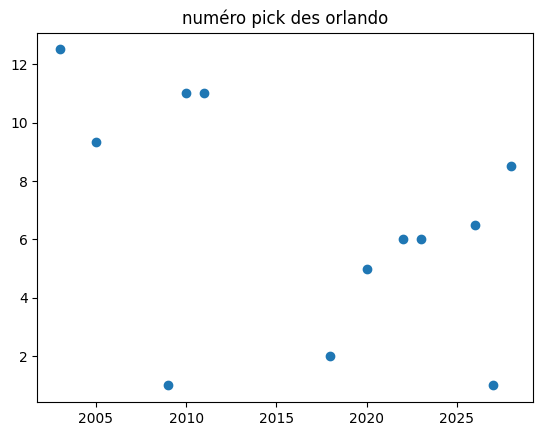

In [49]:
x = df_draft_orlando_moy['season_ajust5'].values
y = df_draft_orlando_moy['mean_overall_pick'].values

# Creation of the scatter plot
plt.scatter(x, y)
plt.title("numéro pick des orlando")
plt.show()

graphique Barplot des victoires

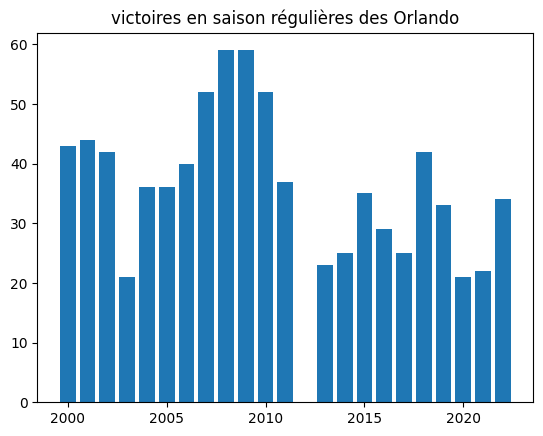

In [50]:
plt.bar(pick_vs_classement_magic['season_ajust5'].values, pick_vs_classement_magic['total_victoire'].values)
plt.title("victoires en saison régulières des Orlando")
plt.show()

graph des picks comparé aux nombres de victoires

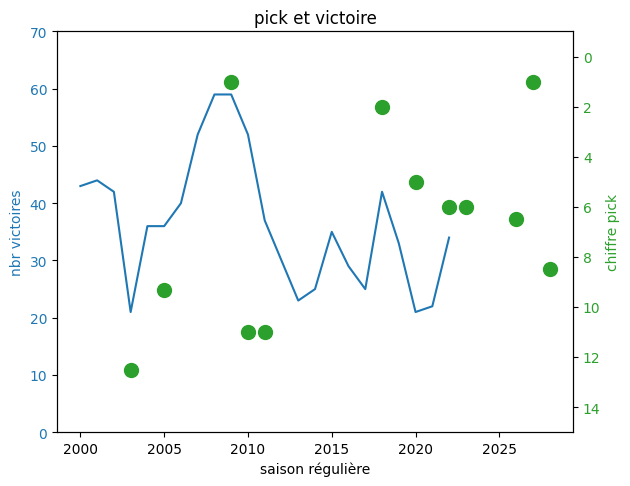

In [51]:

x = pick_vs_classement_magic['season_ajust5'].values
y1 = pick_vs_classement_magic['total_victoire'].values  # données pour le premier axe y
y2 = pick_vs_classement_magic['mean_overall_pick'].values    # Exemple de données pour le deuxième axe y

fig, ax1 = plt.subplots()  # Créer un subplot

# Premier axe y
ax1.set_xlabel('saison régulière')  # Étiquette pour l'axe x
ax1.set_ylabel('nbr victoires', color='tab:blue')  # Étiquette et couleur pour le premier axe y
ax1.plot(x, y1, color='tab:blue', label='nbr total de victoires')  # Tracer les données pour le premier axe y
ax1.tick_params(axis='y', labelcolor='tab:blue')  # Couleur des graduations du premier axe y
# Définir les limites pour le premier axe y
ax1.set_ylim(0, 70)

# Second axe y
ax2 = ax1.twinx()  # Instancier un second axe y partageant le même axe x
ax2.set_ylabel('chiffre pick', color='tab:green')  # Étiquette et couleur pour le deuxième axe y
ax2.scatter(x, y2, color='tab:green', label='Pick', s=100)  # Tracer des points pour le deuxième axe y
ax2.tick_params(axis='y', labelcolor='tab:green')  # Couleur des graduations du deuxième axe y
# Définir les limites pour le second axe y
ax2.set_ylim(-1, 15)
# Inverser l'axe des ordonnées pour ax2
ax2.invert_yaxis()

# Calculer et tracer la courbe de tangente pour ax2 ==> pas de valeur ajoutée
# y2_tangent = np.tan(np.radians(y2))
# ax2.plot(x, y2_tangent, color='tab:orange', linestyle='--', label='Tangente')

# Affichage des légendes
fig.tight_layout()  # Ajuster le layout pour éviter les chevauchements
plt.title('pick et victoire')  # Titre du graphique
plt.show()  # Afficher le graphique